# Anemia Predictive Analytics

## A. Business Understanding

Anemia adalah kondisi di mana tubuh kekurangan sel darah merah atau hemoglobin yang cukup untuk membawa oksigen ke jaringan tubuh. Kondisi ini dapat mempengaruhi kinerja fisik dan mental serta menurunkan kualitas hidup seseorang. Deteksi dini dan prediksi anemia sangat penting untuk mengurangi risiko komplikasi kesehatan yang lebih serius.

Dalam industri kesehatan, penggunaan predictive analytics semakin menjadi tren untuk memprediksi berbagai kondisi medis, termasuk anemia. Menggunakan data dari berbagai variabel pasien (seperti usia, jenis kelamin, kadar hemoglobin, pola makan, dan riwayat kesehatan), machine learning dapat memprediksi kemungkinan seseorang menderita anemia. Ini memungkinkan intervensi medis yang lebih cepat dan efektif.

## B. Data Understanding
Mengatur dan menghubungkan Kaggle dengan Google Colaboratory. Langkah ini bertujuan untuk mengunduh dataset yang tersedia di Kaggle agar bisa digunakan dalam pengembangan model di Colaboratory.

### Connect to Kaggle

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
  # kaggle API Token
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/PYTHON/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [39]:
# API Command from Anemia Dataset
!kaggle datasets download -d biswaranjanrao/anemia-dataset

Dataset URL: https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset
License(s): unknown
anemia-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
# Unzipping Datasets
!unzip -o /content/anemia-dataset.zip -d /content/drive/MyDrive/PYTHON/Dataset

Archive:  /content/anemia-dataset.zip
  inflating: /content/drive/MyDrive/PYTHON/Dataset/anemia.csv  


### Data Loading

In [41]:
# library to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE #oversampling
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.model_selection import train_test_split #splitting

# machine learning
from sklearn.svm import SVC #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.metrics import accuracy_score #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #report

# ignore all future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
# read_csv
df = pd.read_csv('/content/drive/MyDrive/PYTHON/Dataset/anemia.csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


### Data Cleaning
Pembersihan data diperlukan untuk memperbaiki atau menghapus data yang tidak akurat, rusak, berformat salah, duplikat, atau tidak lengkap (missing values) di dalam dataset.

In [43]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [44]:
# check missing values
(df.isnull() | df.empty | df.isna()).sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


In [45]:
# duplicates data checking
df.duplicated().sum()

887

In [46]:
# remove the duplicates data
df.drop_duplicates(inplace=True)
if df.duplicated().sum() == 0:
  print('No Duplicates')

No Duplicates


In [47]:
# check dimensinality
df.shape

(534, 6)

In [48]:
# check the decriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,534.0,0.522472,0.499963,0.0,0.000,1.00,1.000,1.0
Hemoglobin,534.0,13.287079,2.066276,6.6,11.600,13.10,14.975,16.9
MCH,534.0,22.911985,3.948482,16.0,19.500,22.75,26.100,30.0
MCHC,534.0,30.249438,1.412312,27.8,29.000,30.40,31.475,32.5
MCV,534.0,85.647004,9.604934,69.4,77.325,85.45,94.150,101.6
Result,534.0,0.462547,0.499063,0.0,0.000,0.00,1.000,1.0


Pada tahap pembersihan data, teridentifikasi adanya 887 entri duplikat dalam dataset yang digunakan. Duplikasi ini harus dihapus untuk memastikan keakuratan model dalam melakukan prediksi. Meskipun jumlah duplikat cukup signifikan, dataset tetap dapat digunakan karena masih tersedia 534 entri yang valid, yang dianggap cukup memadai untuk analisis lebih lanjut.

Selanjutnya, berdasarkan hasil dari fungsi info(), ditemukan bahwa dataset memiliki 5 atribut, yaitu 'Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', serta 1 kelas yaitu 'Result'. Atribut 'Gender' dan kelas 'Result' saat ini bertipe data numerik, sehingga perlu dikonversi ke tipe data kategorikal guna memfasilitasi proses Exploratory Data Analysis (EDA).

Setelah itu, fungsi describe() digunakan untuk memberikan ringkasan statistik yang mencakup informasi terkait tendensi sentral, distribusi, serta jangkauan data dalam dataset.

## C. Exploratory Data Analysis (EDA)
Analisis data eksploratif (Exploratory Data Analysis/EDA) adalah proses awal yang penting untuk memahami dataset, menganalisis karakteristiknya, menemukan pola, mendeteksi anomali, dan memeriksa asumsi data dengan memanfaatkan metode statistik serta visualisasi grafis. Pada tahap pembersihan data sebelumnya, sebenarnya sudah dilakukan proses EDA dengan menggali informasi terkait dataset, atribut, kelas, jumlah instance, dan statistik deskriptif.

Di sini, eksplorasi lanjutan akan dilakukan untuk menganalisis lebih dalam dan mengetahui wawasan (insight) yang dapat diperoleh dari dataset ini. Sebelumnya, akan dilakukan konversi data numerik menjadi kategorikal.

In [49]:
# converting numerical data into categorical
def categorization(data):
  df.astype({'Gender':'object'}, {'Result':'object'})
  df.replace(to_replace={'Gender':{0:'Female', 1:'Male'}}, inplace=True)
  df.replace(to_replace={'Result':{0:'Negative', 1:'Positive'}}, inplace=True)

  return df

In [50]:
# apply to datasets
categorization(df)
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Male,14.9,22.7,29.1,83.7,Negative
1,Female,15.9,25.4,28.3,72.0,Negative
2,Female,9.0,21.5,29.6,71.2,Positive
3,Female,14.9,16.0,31.4,87.5,Negative
4,Male,14.7,22.0,28.2,99.5,Negative


**Univariate Analysis**

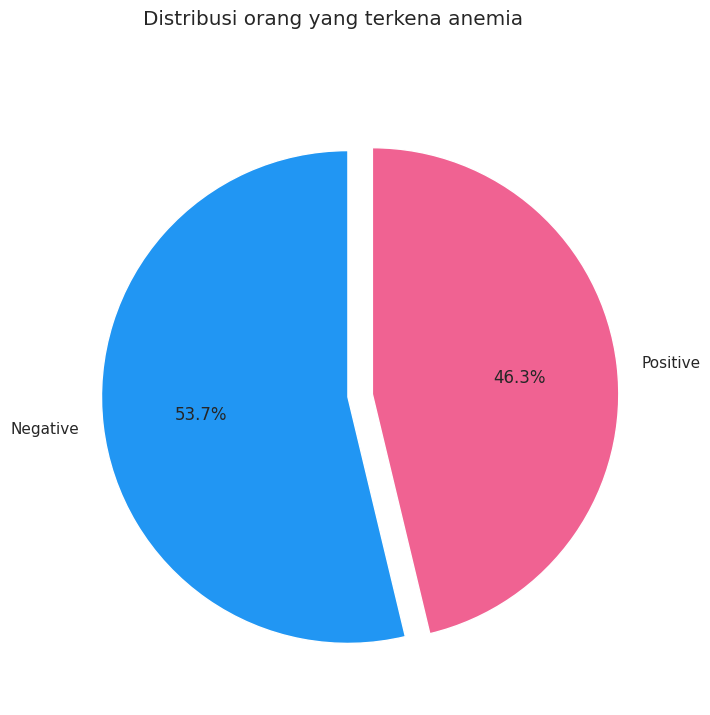

<Figure size 640x480 with 0 Axes>

In [51]:
# Menyiapkan kanvas
plt.figure(figsize=(12, 8))

# Visualisasi diagram pie
df['Result'].value_counts().plot(kind='pie',
                                 explode=[0, 0.1],
                                 autopct='%1.1f%%',
                                 colors=['#2196F3', '#F06292'],
                                 startangle=90,
                                 shadow=False)

plt.ylabel('')
plt.suptitle('Distribusi orang yang terkena anemia')
plt.show()
plt.savefig('anemia.png')


**Correlation Hemoglobin**

<Axes: xlabel='Gender', ylabel='Hemoglobin'>

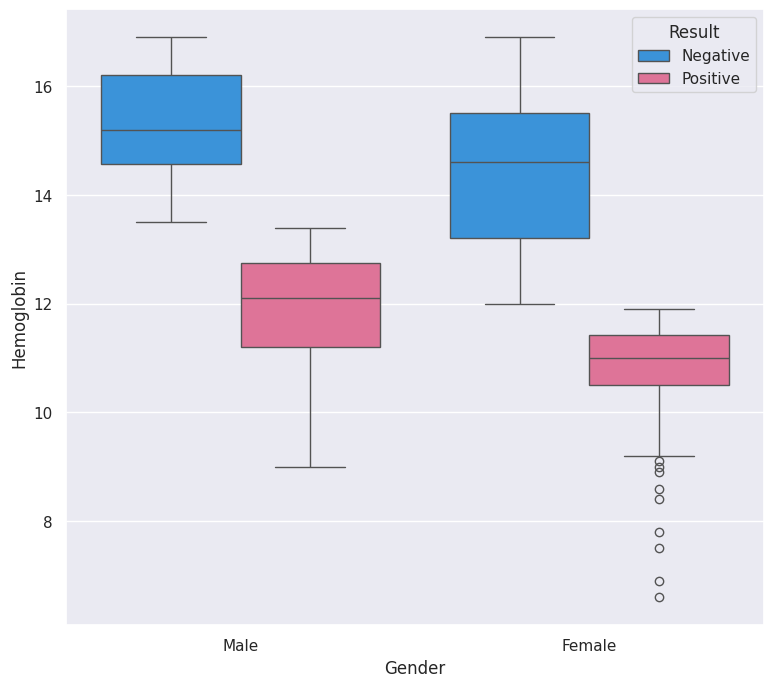

In [52]:
sns.set(rc = {'figure.figsize':(9,8)})
sns.boxplot(x='Gender',y='Hemoglobin', hue='Result', palette={"Negative": "#2196F3", "Positive": "#F06292"}, data=df)


Berdasarkan analisis boxplot, dapat disimpulkan bahwa terdapat perbedaan signifikan pada kadar hemoglobin berdasarkan jenis kelamin dan hasil tes. Pria secara umum memiliki kadar hemoglobin yang lebih tinggi dibandingkan wanita, baik pada kelompok dengan hasil tes positif maupun negatif. Selain itu, hasil tes juga mempengaruhi kadar hemoglobin, di mana individu dengan hasil negatif cenderung memiliki kadar hemoglobin yang lebih tinggi dibandingkan individu dengan hasil positif. Kelompok wanita dengan hasil positif menunjukkan kadar hemoglobin terendah dibandingkan kelompok lainnya, bahkan terdapat beberapa outlier yang menunjukkan nilai hemoglobin sangat rendah. Secara keseluruhan, pria dengan hasil negatif memiliki rentang kadar hemoglobin yang lebih luas dan lebih tinggi, sementara wanita dengan hasil positif memiliki rentang kadar hemoglobin yang lebih sempit dengan nilai yang lebih rendah.

**MCV (Mean Corpuscular Volume)**

<Axes: xlabel='MCV', ylabel='Result'>

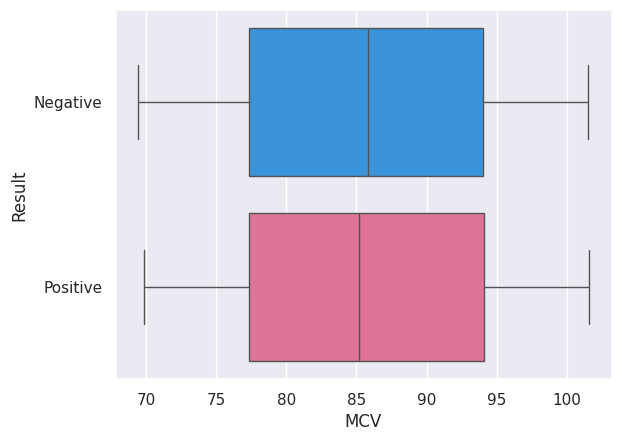

In [53]:
sns.set(rc = {'figure.figsize':(6.4, 4.8)})
sns.boxplot(x='MCV',y='Result', hue='Result', palette={"Negative": "#2196F3", "Positive": "#F06292"}, data=df)

Berdasarkan boxplot tersebut, dapat dilihat bahwa distribusi MCV pada kedua kelompok memiliki rentang nilai yang hampir serupa, dengan nilai median yang hampir sama di sekitar angka 85. Namun, terdapat variasi yang lebih besar pada kelompok dengan hasil negatif, seperti yang ditunjukkan oleh panjang whiskers yang lebih panjang dibandingkan dengan kelompok positif. Secara keseluruhan, tidak terdapat perbedaan yang mencolok antara nilai MCV pada kedua kelompok ini, yang menunjukkan bahwa MCV mungkin bukan merupakan faktor pembeda yang signifikan antara hasil positif dan negatif dalam konteks analisis ini.

**MCH (Mean Corpuscular Hemoglobin)**

<Axes: xlabel='MCH', ylabel='Result'>

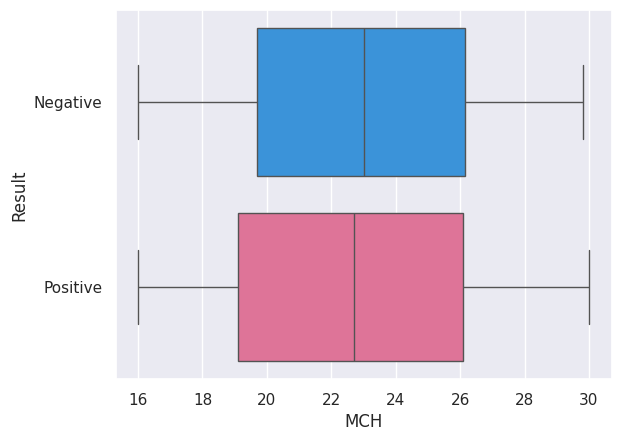

In [54]:
sns.set(rc = {'figure.figsize':(6.4, 4.8)})
sns.boxplot(x='MCH',y='Result', palette={"Negative": "#2196F3", "Positive": "#F06292"}, data=df)

Berdasarkan boxplot tersebut, dapat dilihat bahwa distribusi MCH pada kedua kelompok hampir sama, berada di sekitar 24. Namun, distribusi MCH pada kelompok negatif menunjukkan variasi yang lebih besar dibandingkan dengan kelompok positif, dengan whiskers yang lebih panjang, mengindikasikan adanya data ekstrem di kedua ujung distribusi. Meskipun demikian, rentang nilai pada kedua kelompok cenderung serupa, menunjukkan bahwa seperti halnya MCV, MCH mungkin juga bukan faktor pembeda yang signifikan antara hasil positif dan negatif dalam analisis ini.

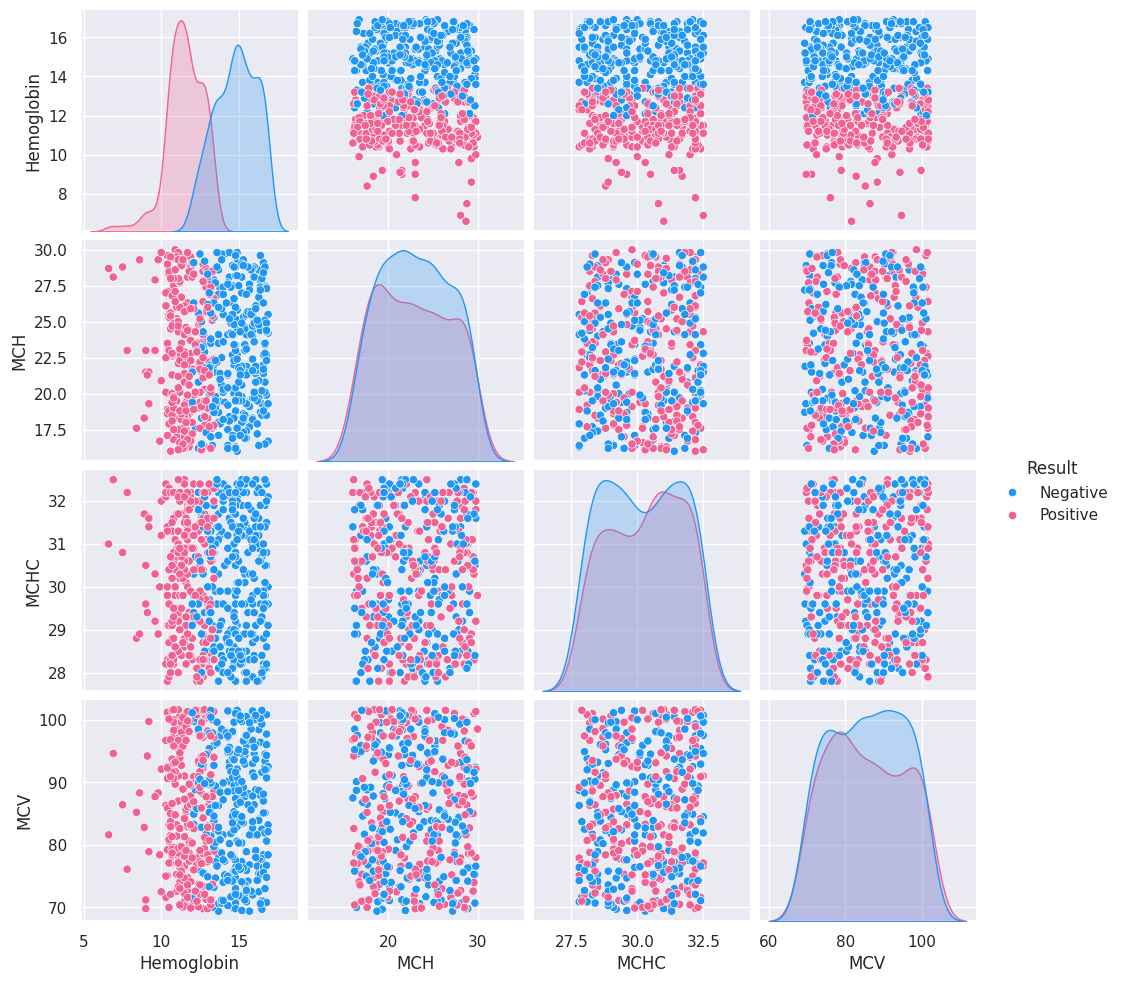

In [55]:
# pair plot
df['Result'] = df['Result'].replace({0: 'Negative'})
df['Result'] = df['Result'].replace({1: 'Positive'})

# Corrected palette key to 'Positive'
palette = {"Negative": "#2196F3", "Positive": "#F06292"}  # Change keys to match the values in 'Result' column


sns.pairplot(df, hue='Result', palette=palette)

plt.show()

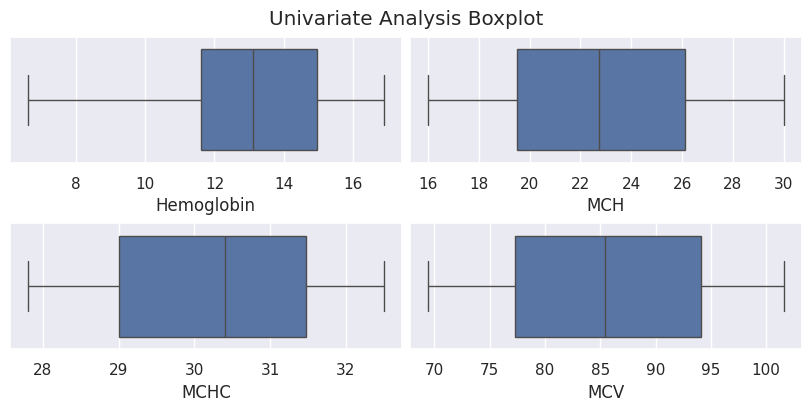

In [56]:
# boxplot
sns.set_theme()
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 4), constrained_layout=True)

plt.suptitle('Univariate Analysis Boxplot')

ax = ax.flatten()
col = df.iloc[:, 1:5]
for i, j in enumerate(col):
  sns.boxplot(x=df[j], ax=ax[i])

Secara keseluruhan, boxplot ini menunjukkan distribusi data yang cukup simetris dengan median yang jelas, serta tidak menunjukkan adanya nilai ekstrem (outlier) atau outlier yang signifikan pada keempat variabel.

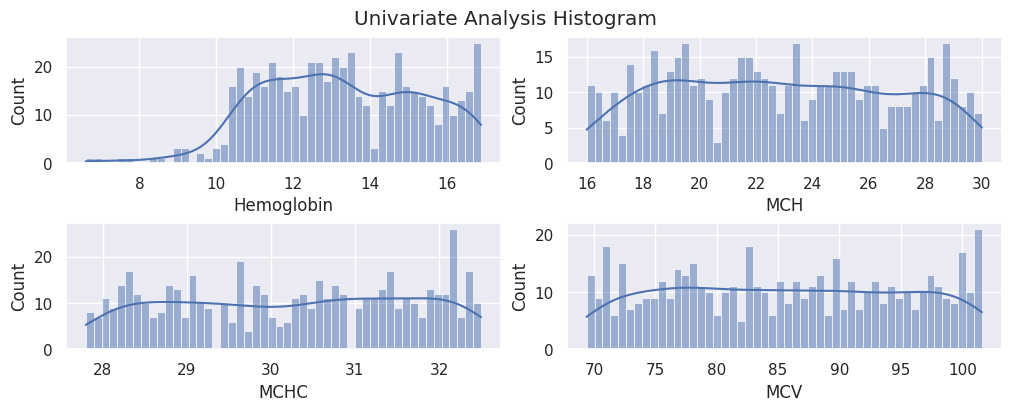

In [57]:
# hisplot
sns.set_theme()
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 4), constrained_layout=True)

plt.suptitle('Univariate Analysis Histogram')

ax = ax.flatten()
col = df.iloc[:, 1:5]
for i, j in enumerate(col):
  sns.histplot(x=df[j], ax=ax[i], kde=True, bins=50)

Secara keseluruhan, histogram ini menunjukkan bagaimana data tersebar di setiap variabel, dengan Hemoglobin memiliki skewness (left-skewed), sementara MCH, MCHC, dan MCV cenderung lebih merata.

## D. Data Preparation
Data preparation sangat penting dalam pengembangan model machine learning, karena proses ini mencakup transformasi data yang diperlukan agar pemodelan dapat berlangsung dengan optimal.

### Encoding

In [58]:
def numerate_categorical(data):
  df.replace(to_replace={'Gender':{'Female':0, 'Male':1}}, inplace=True)
  df.replace(to_replace={'Result':{'Negative':0, 'Positive':1}}, inplace=True)

  df.astype({'Gender':'int64'}, {'Result':'int64'})

  return df

In [59]:
encoding = numerate_categorical(df)
encoding.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## E. Train-Test Split
Dalam proses ini, dataset akan dibagi menjadi data train dan data test sebelum memulai pembuatan model. **Data train** digunakan untuk melatih dan mengembangkan model, sedangkan **data test** berfungsi untuk mengukur sejauh mana model mampu melakukan generalisasi terhadap data baru yang belum pernah dilihat sebelumnya. Pada kasus ini, dataset akan dibagi dengan proporsi 80:20, di mana 20% dari data akan digunakan sebagai data test. Variabel **X** akan digunakan untuk menyimpan atribut-atribut fitur, sedangkan variabel **y** akan digunakan untuk menyimpan nilai kelas atau target yang ingin diprediksi oleh model.

In [60]:
X = df.drop('Result', axis=1)
Y = df['Result'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('X_train: {} data'.format(len(X_train)))
print('X_test: {} data'.format(len(X_test)))
print('y_train: {} data'.format(len(y_train)))
print('y_test: {} data'.format(len(y_test)))

X_train: 427 data
X_test: 107 data
y_train: 427 data
y_test: 107 data


Setelah melakukan proses pembagian data, diperoleh 427 data yang akan digunakan sebagai data train (80%) dan 107 data sebagai data test (20%).

Tahap berikutnya adalah melakukan data scaling, yang bertujuan untuk menyeragamkan nilai-nilai fitur agar berada pada skala yang sama, sehingga dapat meningkatkan kinerja model, terutama untuk algoritma yang sensitif terhadap perbedaan skala. Pada tahap ini, digunakan StandardScaler, yang bekerja dengan mengubah nilai-nilai fitur sehingga memiliki rata-rata nol dan standar deviasi satu, memastikan bahwa semua fitur memiliki distribusi yang seimbang sebelum memasuki proses pemodelan.

### Scaling Data

In [62]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train

array([[-1.03576809, -0.75835995, -0.78250735, -0.97752786, -1.45579792],
       [ 0.96546709,  0.91500333,  1.52027121, -1.47511484,  0.47836596],
       [ 0.96546709, -0.56711844,  1.3431344 ,  0.08872996,  0.13520785],
       ...,
       [ 0.96546709, -1.28427413, -0.0739601 , -0.83536015, -0.19755153],
       [ 0.96546709, -1.18865337, -0.80781261,  0.37306538,  1.45584663],
       [ 0.96546709, -1.37989489, -1.4910546 ,  0.79956851,  0.51996088]])

### Imbalance Class
Imbalance class adalah kondisi di mana distribusi label pada dataset tidak merata, dengan salah satu kelas memiliki jumlah data yang jauh lebih sedikit dibandingkan kelas lainnya. Situasi ini sering muncul dalam permasalahan prediksi klasifikasi dan dapat berdampak negatif pada performa model, terutama dalam memprediksi kelas minoritas. Oleh karena itu, diperlukan penanganan khusus untuk mengatasi ketidakseimbangan ini.

Salah satu teknik yang akan digunakan untuk menangani class imbalance adalah oversampling dengan metode Synthetic Minority Oversampling Technique (SMOTE). SMOTE merupakan teknik statistik yang bertujuan untuk meningkatkan jumlah data pada kelas minoritas dengan cara mensintesis data baru berdasarkan data minoritas yang ada, sehingga distribusi antar kelas menjadi lebih seimbang dan model dapat belajar secara lebih efektif dalam memprediksi kedua kelas.

Text(0.5, 1.0, 'Imbalance Class Before SMOTE')

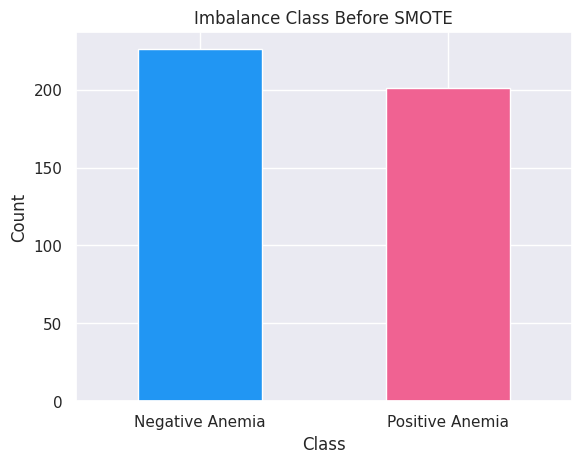

In [64]:
df_y_train = pd.DataFrame(y_train)
df_y_train.value_counts().plot(kind='bar', color=['#2196F3', '#F06292'])
plt.xticks([0, 1], ['Negative Anemia', 'Positive Anemia'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')

plt.title('Imbalance Class Before SMOTE')

In [65]:
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Imbalance Class After SMOTE')

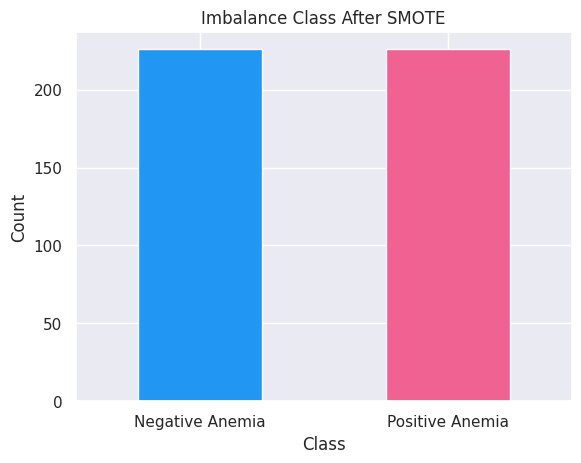

In [73]:
df_y_smote = pd.DataFrame(y_smote)
df_y_smote.value_counts().plot(kind='bar', color=['#2196F3', '#F06292'])
plt.xticks([0, 1], ['Negative Anemia', 'Positive Anemia'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')

plt.title('Imbalance Class After SMOTE')

## F. Predictive Modeling

In [67]:
# model
modelRF = RandomForestClassifier(n_estimators=50)
modelKNN = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
modelSVC = SVC(kernel='rbf')

# fit
modelRF.fit(X_smote, y_smote)
modelKNN.fit(X_smote, y_smote)
modelSVC.fit(X_smote, y_smote)

# predict
y_predRF = modelRF.predict(X_test)
y_predKNN = modelKNN.predict(X_test)
y_predSVC = modelSVC.predict(X_test)

## G. Evaluation

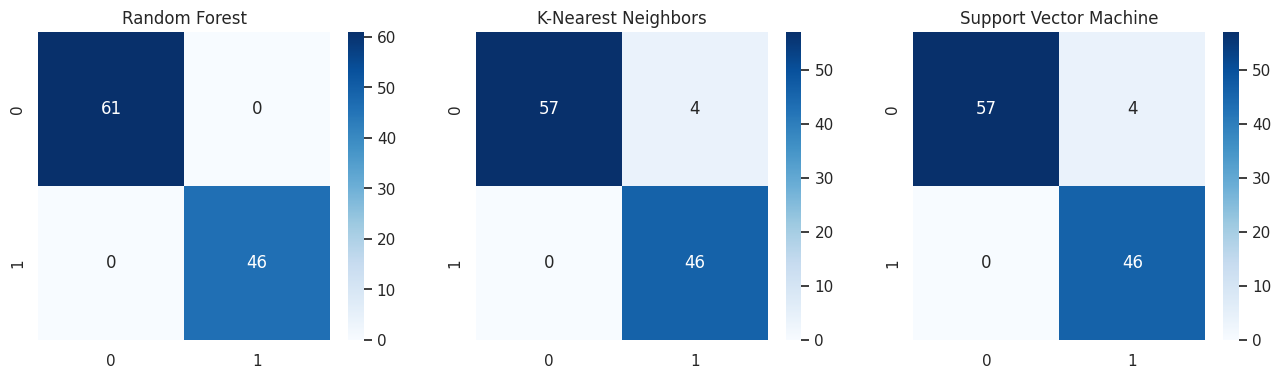

In [68]:
# confusion-matrix
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

conf_matrixRF = confusion_matrix(y_test, y_predRF)
sns.heatmap(conf_matrixRF, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest')

conf_matrixKNN = confusion_matrix(y_test, y_predKNN)
sns.heatmap(conf_matrixKNN, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('K-Nearest Neighbors')

conf_matrixSVC = confusion_matrix(y_test, y_predSVC)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Support Vector Machine')

plt.show()

In [69]:
# accuracy score
accuracy_score = pd.DataFrame(columns=['Train', 'Test'], index=['Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine'])
model_dict = {'Random Forest': modelRF, 'K-Nearest Neighbors': modelKNN, 'Support Vector Machine': modelSVC}
for model_name, model in model_dict.items():
  accuracy_score.loc[model_name, 'Train'] = model.score(X_train, y_train)
  accuracy_score.loc[model_name, 'Test'] = model.score(X_test, y_test)

accuracy_score

,Train,Test
Random Forest,1.0,1.0
K-Nearest Neighbors,0.976581,0.962617
Support Vector Machine,0.98829,0.962617


In [70]:
RF_report_df = classification_report(y_test, y_predRF, output_dict=True)

# Mengubah hasil classification RF_report menjadi DataFrame
RF_report_df = pd.DataFrame(RF_report_df).transpose()

# Menampilkan Dataframe dengan format yang lebih baik
RF_report_df

,precision,recall,f1-score,support
0,1.0,1.0,1.0,61.0
1,1.0,1.0,1.0,46.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,107.0
weighted avg,1.0,1.0,1.0,107.0


In [71]:
KNN_report_df = classification_report(y_test, y_predKNN, output_dict=True)

# Mengubah hasil classification KNN_report menjadi DataFrame
KNN_report_df = pd.DataFrame(KNN_report_df).transpose()

# Menampilkan DataFrame dengan format yang lebih baik
KNN_report_df

,precision,recall,f1-score,support
0,1.000000,0.934426,0.966102,61.000000
1,0.920000,1.000000,0.958333,46.000000
accuracy,0.962617,0.962617,0.962617,0.962617
macro avg,0.960000,0.967213,0.962218,107.000000
weighted avg,0.965607,0.962617,0.962762,107.000000


In [72]:
SVM_report_df = classification_report(y_test, y_predSVC, output_dict=True)

# Mengubah hasil classification SVM_report menjadi DataFrame
SVM_report_df = pd.DataFrame(SVM_report_df).transpose()

# Menampilkan DataFrame dengan format yang lebih baik
SVM_report_df

,precision,recall,f1-score,support
0,1.000000,0.934426,0.966102,61.000000
1,0.920000,1.000000,0.958333,46.000000
accuracy,0.962617,0.962617,0.962617,0.962617
macro avg,0.960000,0.967213,0.962218,107.000000
weighted avg,0.965607,0.962617,0.962762,107.000000


Berdasarkan hasil analisis yang dilakukan, model Random Forest terbukti menjadi model yang paling unggul dibandingkan dengan model lainnya yang telah dikembangkan dalam penelitian ini. Model ini berhasil mencapai nilai recall sebesar 100%, yang menunjukkan bahwa model Random Forest mampu mengidentifikasi semua kasus positif dengan sempurna tanpa adanya kesalahan. Dengan performa recall yang sangat tinggi ini, model Random Forest menunjukkan keandalannya dalam mendeteksi dan memprediksi kejadian positif secara konsisten. Oleh karena itu, model ini sangat layak digunakan sebagai predictive modelling dalam skenario yang memerlukan tingkat deteksi yang tinggi, terutama ketika kesalahan dalam mengabaikan kasus positif dapat berdampak signifikan. Dengan kata lain, model ini tidak hanya efisien tetapi juga efektif dalam memberikan hasil prediksi yang akurat, menjadikannya pilihan terbaik untuk diterapkan dalam berbagai aplikasi praktis yang memerlukan analisis prediktif yang handal.